# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|██████████| 60.0K/60.0K [00:08<00:00, 7.25KFile/s]


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

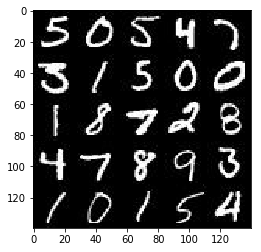

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

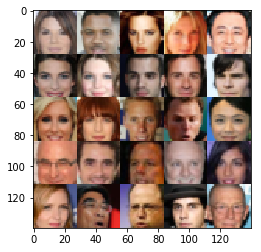

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    real_inputs_ph = tf.placeholder(tf.float32,
                                 shape=(None, image_width, image_height, image_channels),
                                 name='real_inputs_ph')
    
    
    z_inputs_ph = tf.placeholder(tf.float32,
                                 (None, z_dim),
                                 name='z_inputs_ph')
    
    learning_rate_ph = tf.placeholder(tf.float32,
                                   name='learning_rate_ph')

    return real_inputs_ph, z_inputs_ph, learning_rate_ph


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    _discriminator_alpha = 0.2
    _conv_init_size = 64
    _2_times_conv_init_size = 2*_conv_init_size
    _4_times_conv_init_size = 4*_conv_init_size
    _8_times_conv_init_size = 8*_conv_init_size

    
    with tf.variable_scope('discriminator', reuse=reuse):
        
        ########################### 1st ############################
        _1st_conv = tf.layers.conv2d(images, 
                                     _conv_init_size, 
                                     5, 2, 'SAME')
        _1st_leaky_relu = tf.maximum(_discriminator_alpha * _1st_conv, 
                                     _1st_conv)
        
        
        ########################### 2nd ############################
        _2nd_conv = tf.layers.conv2d(_1st_leaky_relu, 
                                     _2_times_conv_init_size,
                                     5, 2, 'SAME')
        _2nd_batch_norm = tf.layers.batch_normalization(_2nd_conv, 
                                                        training=True)
        _2nd_leaky_relu = tf.maximum(_discriminator_alpha * _2nd_batch_norm,
                                     _2nd_batch_norm)
        
        
        
        ########################### 3rd ############################
        _3rd_conv = tf.layers.conv2d(_2nd_leaky_relu, 
                                     _4_times_conv_init_size, 
                                     5, 1, 'SAME')
        _3rd_batch_norm = tf.layers.batch_normalization(_3rd_conv, 
                                                        training=True)
        _3rd_leaky_relu = tf.maximum(_discriminator_alpha * _3rd_batch_norm, 
                                     _3rd_batch_norm)
        
        
        
        ########################### 4th ############################
        _4th_conv = tf.layers.conv2d(_3rd_leaky_relu, 
                                     _8_times_conv_init_size, 
                                     5, 1, 'SAME')
        _4th_batch_norm = tf.layers.batch_normalization(_4th_conv, 
                                                        training=True)
        _4th_leaky_relu = tf.maximum(_discriminator_alpha * _4th_batch_norm,
                                     _4th_batch_norm)
        
        
        ########################### flatten ############################
        _flat_4th_leaky_relu = tf.reshape(_4th_leaky_relu, (-1, 7*7*_8_times_conv_init_size))
        
        ########################## fully connected dense ###############
        _discriminator_logits = tf.layers.dense(_flat_4th_leaky_relu, 1)
        
        ########################## segmoid logits ###############
        _discriminator_output = tf.sigmoid(_discriminator_logits)
        
        return _discriminator_output, _discriminator_logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    _generator_alpha = 0.2
    
    _conv_init_size = 64
    _2_times_conv_init_size = 2*_conv_init_size
    _4_times_conv_init_size = 4*_conv_init_size
    _8_times_conv_init_size = 8*_conv_init_size
    
    with tf.variable_scope('generator', reuse= not is_train):
        
        ########################### 1st ############################
        _1st_dense = tf.layers.dense(z,
                                     7*7*_8_times_conv_init_size)
        _1st_dense_flatten = tf.reshape(_1st_dense,
                                        (-1, 7, 7, _8_times_conv_init_size))
        _1st_out = tf.maximum(_generator_alpha*_1st_dense_flatten,
                              _1st_dense_flatten)
        
        
        ########################### 2nd ############################
        _2nd_conv = tf.layers.conv2d_transpose(_1st_out, 
                                             _4_times_conv_init_size,
                                             3, 1, 'SAME')
        _2nd_batch_norm = tf.layers.batch_normalization(_2nd_conv, 
                                                        training=is_train)
        _2nd_leaky_relu = tf.maximum(_generator_alpha * _2nd_batch_norm, 
                                     _2nd_batch_norm)
        
        ########################### 3rd ############################
        _3rd_conv = tf.layers.conv2d_transpose(_2nd_leaky_relu, 
                                             _2_times_conv_init_size, 
                                             3, 1, 'SAME')
        _3rd_batch_norm = tf.layers.batch_normalization(_3rd_conv,
                                                    training=is_train)
        _3rd_leaky_relu = tf.maximum(_generator_alpha * _3rd_batch_norm, 
                                     _3rd_batch_norm)
        
        ########################### 4th ############################
        _4th_conv = tf.layers.conv2d_transpose(_3rd_leaky_relu,
                                               _conv_init_size,
                                               3, 2, 'SAME')
        _4th_batch_norm = tf.layers.batch_normalization(_4th_conv,
                                                    training=is_train)
        _4th_leaky_relu = tf.maximum(_generator_alpha * _4th_batch_norm,
                            _4th_batch_norm)
        
        ########################## logits ##########################
        _generator_logits = tf.layers.conv2d_transpose(_4th_leaky_relu,
                                            out_channel_dim,
                                            3, 2, 'SAME')
        
        ################### hyperbolic tangent logits ###############
        _generator_output = tf.tanh(_generator_logits)
        
        return _generator_output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    _generator_model = generator(input_z, out_channel_dim)
    _discriminator_real_model, _discriminator_real_logits = discriminator(input_real)
    _discriminator_fake_model, _discriminator_fake_logits = discriminator(_generator_model, reuse=True)
    
    _discriminator_real_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits=_discriminator_real_logits, 
            labels=tf.ones_like(_discriminator_real_model) * 0.9))
    
    _discriminator_fake_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits=_discriminator_fake_logits,
            labels=tf.zeros_like(_discriminator_fake_model)))
    
    _total_discriminator_loss = _discriminator_real_loss + _discriminator_fake_loss

    _total_generator_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits=_discriminator_fake_logits,
            labels=tf.ones_like(_discriminator_fake_model)))
    
    return _total_discriminator_loss, _total_generator_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    _model_variables = tf.trainable_variables()
    _discriminator_variables = [variable for variable in _model_variables if variable.name.startswith('discriminator')]
    _generator_variables = [variable for variable in _model_variables if variable.name.startswith('generator')]

    ########################## optimizers ###############
    _discriminator_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=_discriminator_variables)
    _generator_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=_generator_variables)

    return _discriminator_opt, _generator_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [12]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [21]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    tf.reset_default_graph()
    
    _real_input, _z_input, _ = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    
    _discriminator_loss, _generator_loss = model_loss(_real_input, _z_input, data_shape[3])
    
    _discriminator_opt, _generator_opt = model_opt(_discriminator_loss, _generator_loss, learning_rate, beta1)
    
    steps = 0
    
    
    with tf.Session() as train_session:
        train_session.run(tf.global_variables_initializer())
        for epoch in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                batch_images *= 2
                steps += 1
            
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                train_session.run(_discriminator_opt, feed_dict={_real_input: batch_images, _z_input: batch_z})
                train_session.run(_generator_opt, feed_dict={_z_input: batch_z})
                
                if steps % 100 == 0:
                    discriminator_loss = _discriminator_loss.eval({_z_input: batch_z, _real_input: batch_images})
                    generator_loss = _generator_loss.eval({_z_input: batch_z})

                    print("Epoch {}/{}...".format(steps, epoch_count))
                    print("==============Losses================")
                    print("Discriminator: {:.4f}".format(discriminator_loss))
                    print("Generator: {:.4f}".format(generator_loss))
                    
                    show_generator_output(train_session, 1, _z_input, data_shape[3], data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 100/2...
==============Losses================
Discriminator: 2.2175
Generator: 2.6783


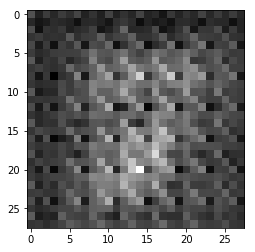

Epoch 200/2...
==============Losses================
Discriminator: 0.8062
Generator: 1.4113


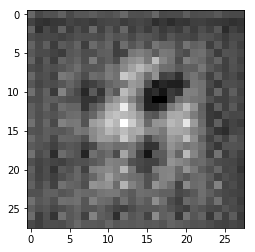

Epoch 300/2...
==============Losses================
Discriminator: 2.5143
Generator: 0.2183


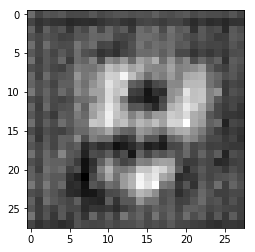

Epoch 400/2...
==============Losses================
Discriminator: 0.7162
Generator: 1.7458


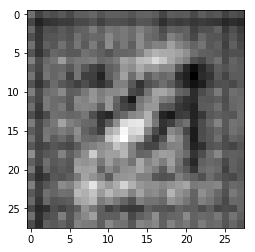

Epoch 500/2...
==============Losses================
Discriminator: 1.3832
Generator: 5.2496


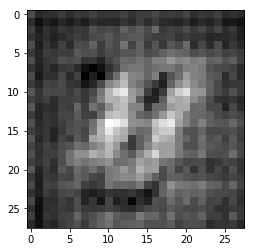

Epoch 600/2...
==============Losses================
Discriminator: 0.7462
Generator: 1.7035


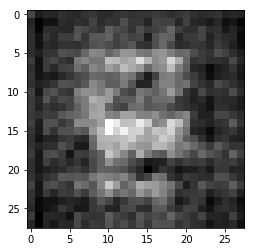

Epoch 700/2...
==============Losses================
Discriminator: 0.9527
Generator: 1.2599


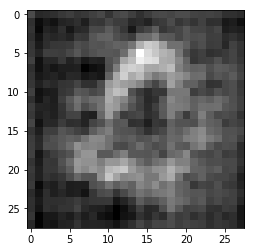

Epoch 800/2...
==============Losses================
Discriminator: 3.8517
Generator: 0.0658


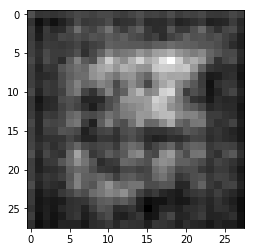

Epoch 900/2...
==============Losses================
Discriminator: 0.6423
Generator: 3.0814


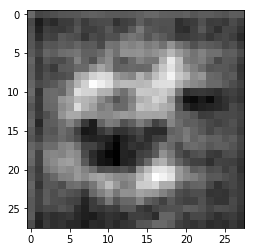

Epoch 1000/2...
==============Losses================
Discriminator: 1.3062
Generator: 0.7389


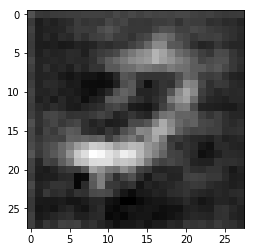

Epoch 1100/2...
==============Losses================
Discriminator: 2.3199
Generator: 0.2426


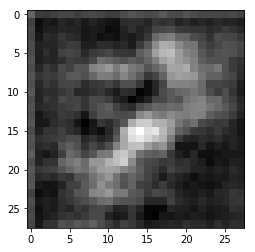

Epoch 1200/2...
==============Losses================
Discriminator: 0.7096
Generator: 1.6980


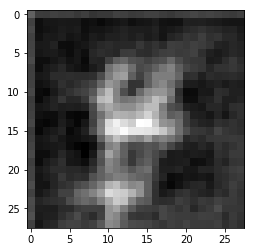

Epoch 1300/2...
==============Losses================
Discriminator: 1.2802
Generator: 2.6411


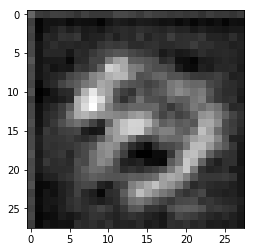

Epoch 1400/2...
==============Losses================
Discriminator: 0.6059
Generator: 1.5290


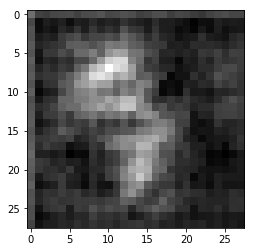

Epoch 1500/2...
==============Losses================
Discriminator: 0.9035
Generator: 1.1176


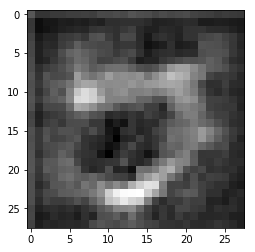

Epoch 1600/2...
==============Losses================
Discriminator: 1.4016
Generator: 0.6881


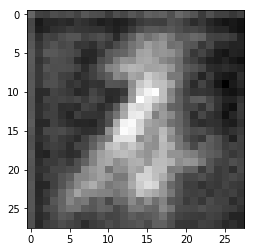

Epoch 1700/2...
==============Losses================
Discriminator: 0.5898
Generator: 2.7835


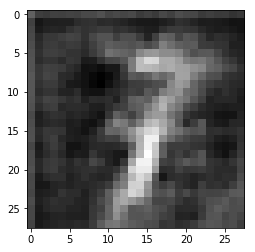

Epoch 1800/2...
==============Losses================
Discriminator: 1.4708
Generator: 0.5358


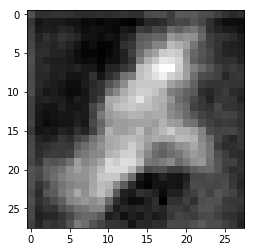

Epoch 1900/2...
==============Losses================
Discriminator: 1.2802
Generator: 0.6793


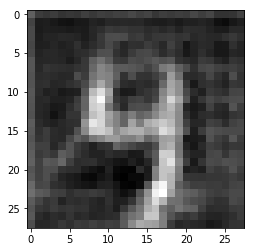

Epoch 2000/2...
==============Losses================
Discriminator: 1.1308
Generator: 3.4332


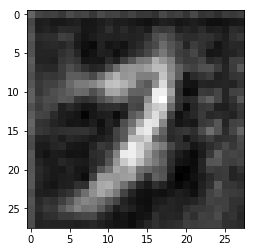

Epoch 2100/2...
==============Losses================
Discriminator: 1.3518
Generator: 0.6026


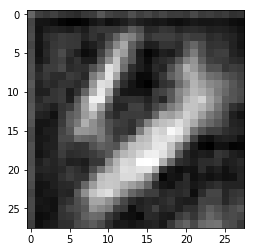

Epoch 2200/2...
==============Losses================
Discriminator: 1.0566
Generator: 1.1476


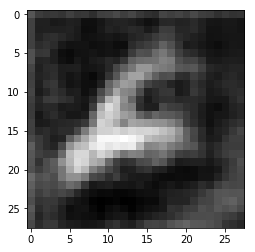

Epoch 2300/2...
==============Losses================
Discriminator: 1.3761
Generator: 0.6075


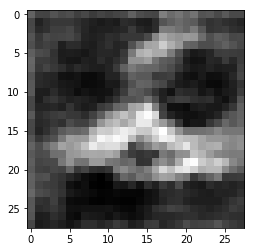

Epoch 2400/2...
==============Losses================
Discriminator: 0.6480
Generator: 1.5956


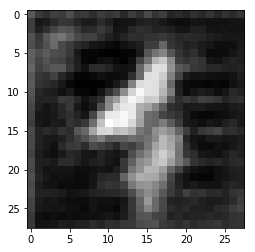

Epoch 2500/2...
==============Losses================
Discriminator: 2.2040
Generator: 0.2709


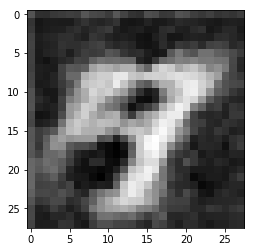

Epoch 2600/2...
==============Losses================
Discriminator: 0.9898
Generator: 1.0401


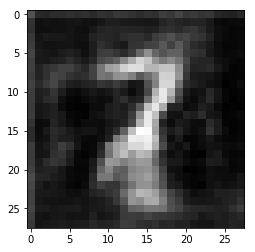

Epoch 2700/2...
==============Losses================
Discriminator: 1.0131
Generator: 1.2830


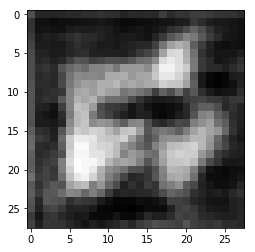

Epoch 2800/2...
==============Losses================
Discriminator: 1.1101
Generator: 0.9405


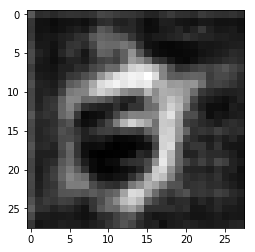

Epoch 2900/2...
==============Losses================
Discriminator: 2.1647
Generator: 0.2099


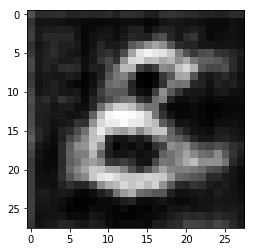

Epoch 3000/2...
==============Losses================
Discriminator: 1.0631
Generator: 0.8195


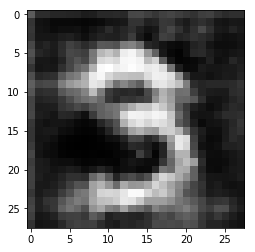

Epoch 3100/2...
==============Losses================
Discriminator: 0.9233
Generator: 3.9686


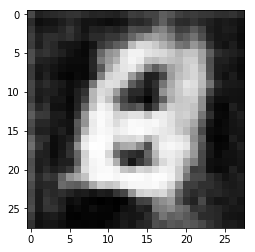

Epoch 3200/2...
==============Losses================
Discriminator: 3.1096
Generator: 0.1292


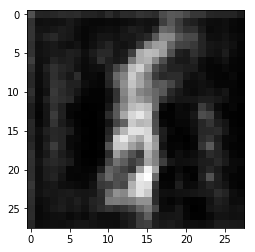

Epoch 3300/2...
==============Losses================
Discriminator: 0.7624
Generator: 1.3466


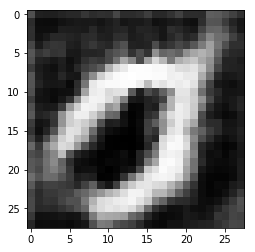

Epoch 3400/2...
==============Losses================
Discriminator: 1.0596
Generator: 1.6393


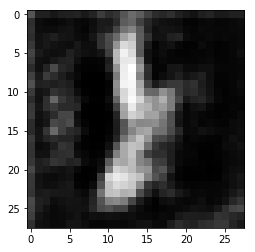

Epoch 3500/2...
==============Losses================
Discriminator: 0.9040
Generator: 1.0720


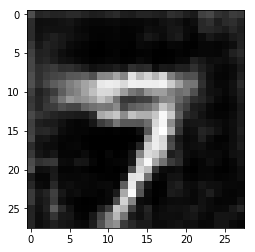

Epoch 3600/2...
==============Losses================
Discriminator: 1.1447
Generator: 2.1098


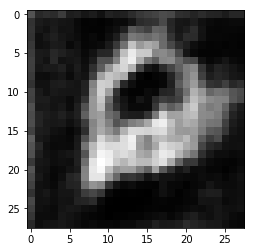

Epoch 3700/2...
==============Losses================
Discriminator: 0.7345
Generator: 1.8747


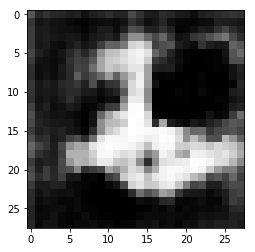

Epoch 3800/2...
==============Losses================
Discriminator: 0.8805
Generator: 1.6682


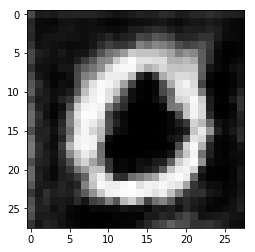

Epoch 3900/2...
==============Losses================
Discriminator: 1.1267
Generator: 0.8088


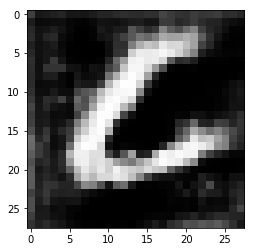

Epoch 4000/2...
==============Losses================
Discriminator: 0.7047
Generator: 1.8731


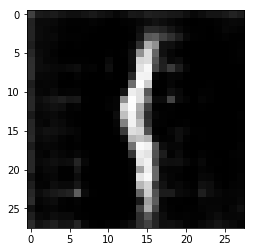

Epoch 4100/2...
==============Losses================
Discriminator: 1.3534
Generator: 0.6319


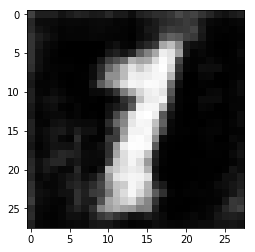

Epoch 4200/2...
==============Losses================
Discriminator: 0.7653
Generator: 1.3925


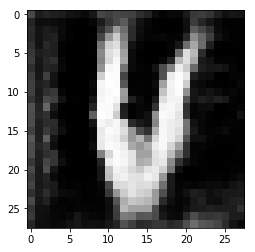

Epoch 4300/2...
==============Losses================
Discriminator: 0.6215
Generator: 2.3378


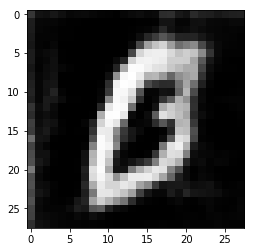

Epoch 4400/2...
==============Losses================
Discriminator: 1.4530
Generator: 0.5908


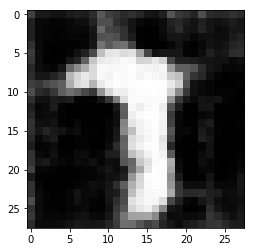

Epoch 4500/2...
==============Losses================
Discriminator: 1.0785
Generator: 1.3267


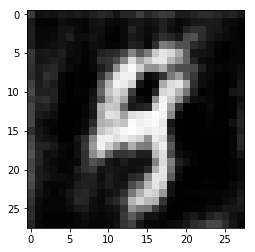

Epoch 4600/2...
==============Losses================
Discriminator: 0.6178
Generator: 1.8253


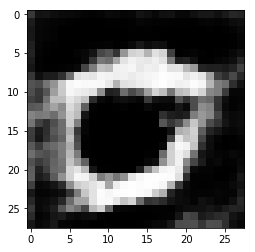

Epoch 4700/2...
==============Losses================
Discriminator: 0.9062
Generator: 1.2169


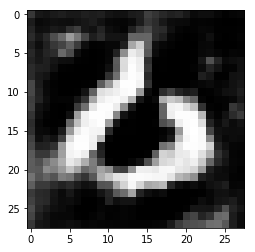

Epoch 4800/2...
==============Losses================
Discriminator: 2.7954
Generator: 0.1893


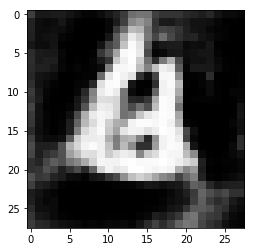

Epoch 4900/2...
==============Losses================
Discriminator: 1.0204
Generator: 1.3037


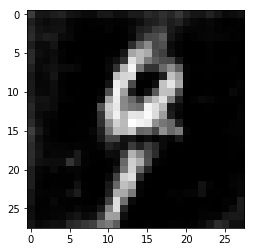

Epoch 5000/2...
==============Losses================
Discriminator: 0.7504
Generator: 1.2509


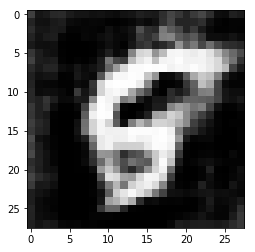

Epoch 5100/2...
==============Losses================
Discriminator: 1.7254
Generator: 0.6516


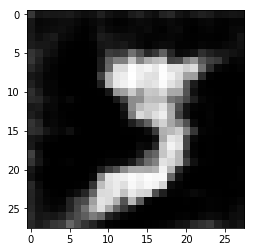

Epoch 5200/2...
==============Losses================
Discriminator: 0.8055
Generator: 1.1653


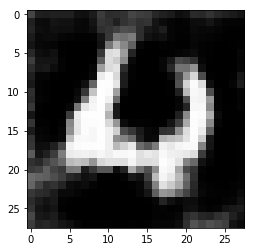

Epoch 5300/2...
==============Losses================
Discriminator: 0.5712
Generator: 1.8614


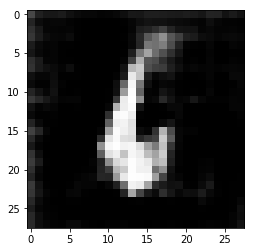

Epoch 5400/2...
==============Losses================
Discriminator: 1.7589
Generator: 0.4800


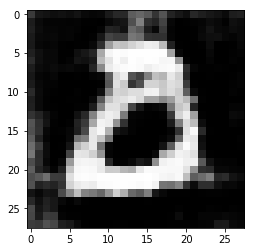

Epoch 5500/2...
==============Losses================
Discriminator: 1.0241
Generator: 0.8743


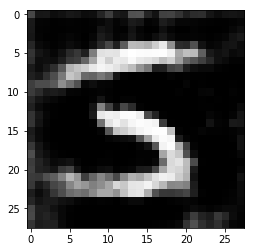

Epoch 5600/2...
==============Losses================
Discriminator: 1.4044
Generator: 0.5767


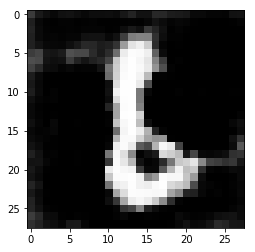

Epoch 5700/2...
==============Losses================
Discriminator: 0.7455
Generator: 2.0999


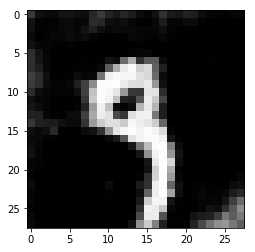

Epoch 5800/2...
==============Losses================
Discriminator: 0.5680
Generator: 2.0634


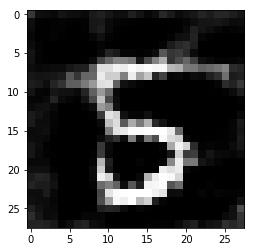

Epoch 5900/2...
==============Losses================
Discriminator: 1.3930
Generator: 0.5608


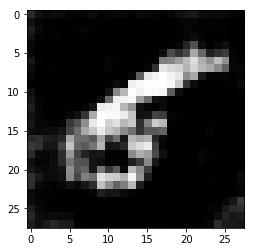

Epoch 6000/2...
==============Losses================
Discriminator: 0.5557
Generator: 2.2560


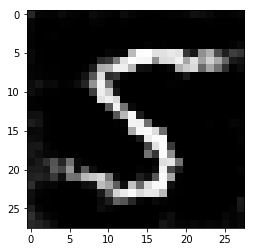

Epoch 6100/2...
==============Losses================
Discriminator: 0.6815
Generator: 2.8059


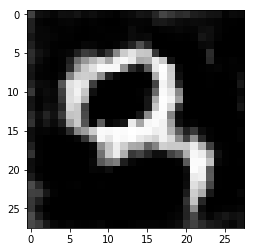

Epoch 6200/2...
==============Losses================
Discriminator: 0.8367
Generator: 1.2576


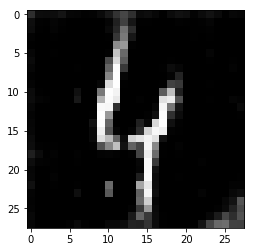

Epoch 6300/2...
==============Losses================
Discriminator: 0.6671
Generator: 2.0813


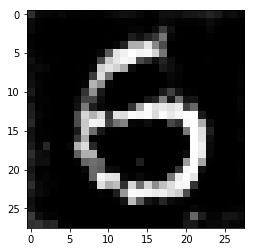

Epoch 6400/2...
==============Losses================
Discriminator: 0.5069
Generator: 2.7283


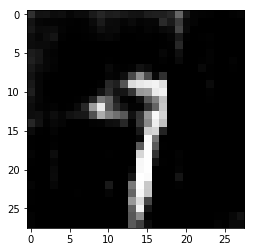

Epoch 6500/2...
==============Losses================
Discriminator: 1.0014
Generator: 2.1402


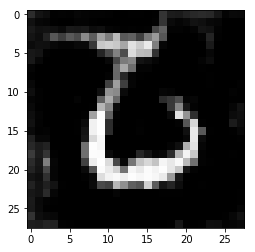

Epoch 6600/2...
==============Losses================
Discriminator: 0.7878
Generator: 1.2712


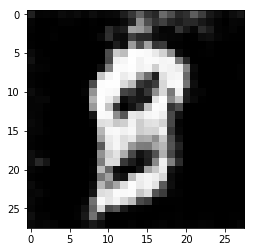

Epoch 6700/2...
==============Losses================
Discriminator: 1.1161
Generator: 0.9607


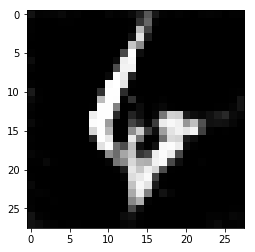

Epoch 6800/2...
==============Losses================
Discriminator: 2.2590
Generator: 0.3624


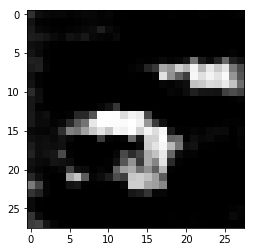

Epoch 6900/2...
==============Losses================
Discriminator: 0.6531
Generator: 1.7359


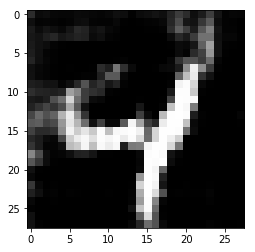

Epoch 7000/2...
==============Losses================
Discriminator: 1.5432
Generator: 0.6828


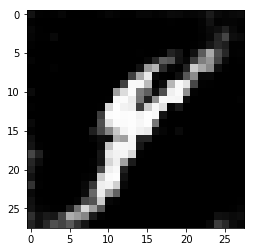

Epoch 7100/2...
==============Losses================
Discriminator: 0.8745
Generator: 1.4266


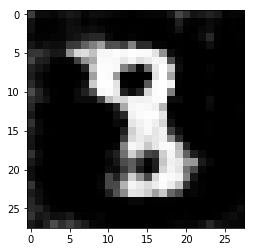

Epoch 7200/2...
==============Losses================
Discriminator: 0.8713
Generator: 1.0320


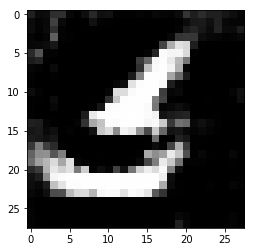

Epoch 7300/2...
==============Losses================
Discriminator: 1.0762
Generator: 0.9118


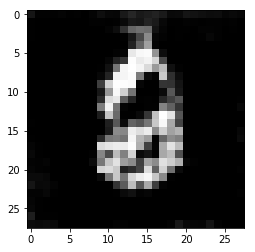

Epoch 7400/2...
==============Losses================
Discriminator: 1.9307
Generator: 0.4300


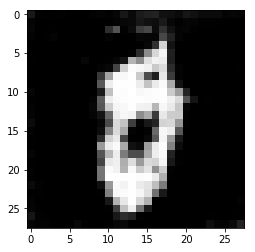

Epoch 7500/2...
==============Losses================
Discriminator: 1.8186
Generator: 0.5223


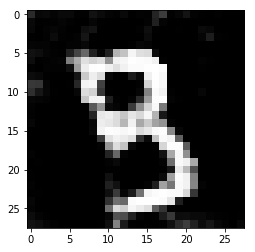

Epoch 7600/2...
==============Losses================
Discriminator: 0.7700
Generator: 4.0778


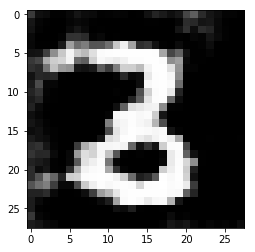

Epoch 7700/2...
==============Losses================
Discriminator: 0.9029
Generator: 1.2664


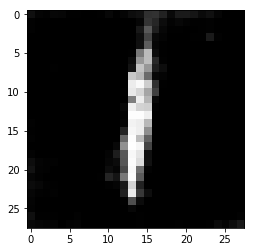

Epoch 7800/2...
==============Losses================
Discriminator: 0.6363
Generator: 1.5693


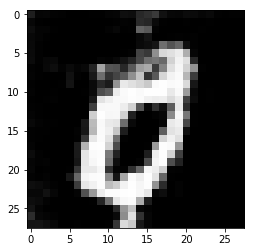

Epoch 7900/2...
==============Losses================
Discriminator: 1.1028
Generator: 0.9205


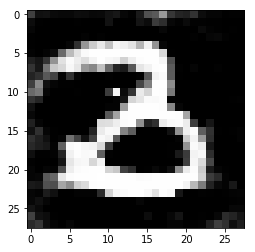

Epoch 8000/2...
==============Losses================
Discriminator: 0.8537
Generator: 1.4905


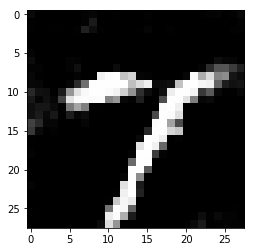

Epoch 8100/2...
==============Losses================
Discriminator: 1.3206
Generator: 0.7507


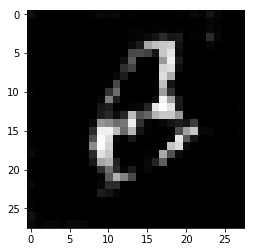

Epoch 8200/2...
==============Losses================
Discriminator: 1.6120
Generator: 0.4285


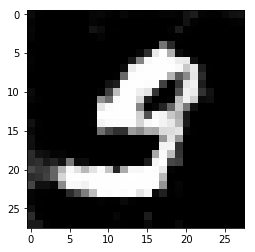

Epoch 8300/2...
==============Losses================
Discriminator: 0.4787
Generator: 2.7236


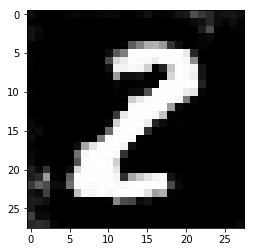

Epoch 8400/2...
==============Losses================
Discriminator: 1.1225
Generator: 1.0768


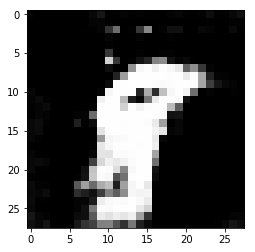

Epoch 8500/2...
==============Losses================
Discriminator: 0.8715
Generator: 1.1055


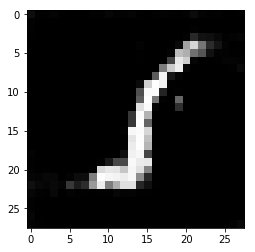

Epoch 8600/2...
==============Losses================
Discriminator: 0.5888
Generator: 2.0620


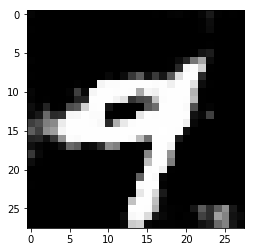

Epoch 8700/2...
==============Losses================
Discriminator: 1.6440
Generator: 0.4928


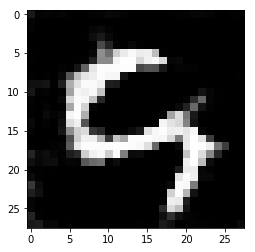

Epoch 8800/2...
==============Losses================
Discriminator: 0.3723
Generator: 4.1884


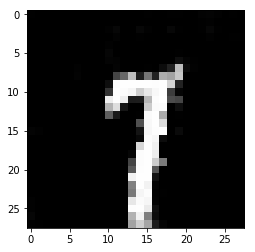

Epoch 8900/2...
==============Losses================
Discriminator: 2.2029
Generator: 0.2069


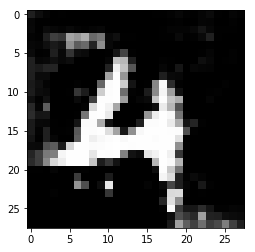

Epoch 9000/2...
==============Losses================
Discriminator: 0.7438
Generator: 1.4161


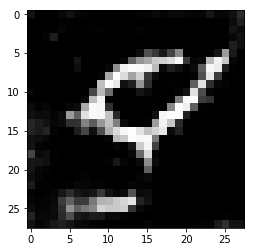

Epoch 9100/2...
==============Losses================
Discriminator: 0.9404
Generator: 1.2263


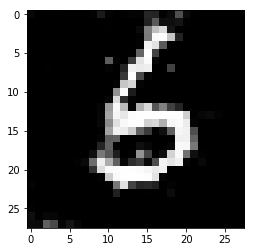

Epoch 9200/2...
==============Losses================
Discriminator: 0.6793
Generator: 1.6544


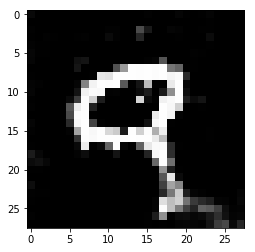

Epoch 9300/2...
==============Losses================
Discriminator: 1.8754
Generator: 0.4493


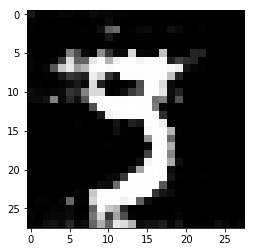

Epoch 9400/2...
==============Losses================
Discriminator: 0.7392
Generator: 1.2057


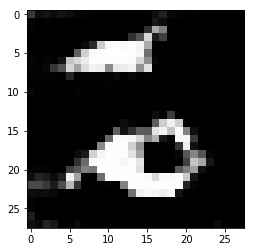

Epoch 9500/2...
==============Losses================
Discriminator: 0.4076
Generator: 3.0266


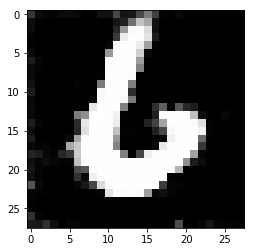

Epoch 9600/2...
==============Losses================
Discriminator: 0.7969
Generator: 1.3494


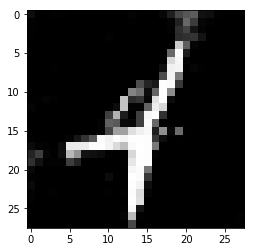

Epoch 9700/2...
==============Losses================
Discriminator: 0.6725
Generator: 1.5535


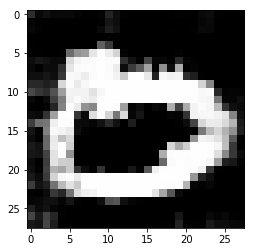

Epoch 9800/2...
==============Losses================
Discriminator: 1.9206
Generator: 0.3164


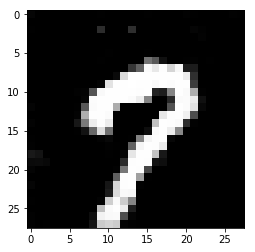

Epoch 9900/2...
==============Losses================
Discriminator: 1.0902
Generator: 0.9769


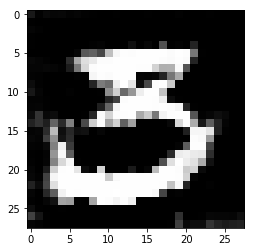

Epoch 10000/2...
==============Losses================
Discriminator: 0.9348
Generator: 0.9466


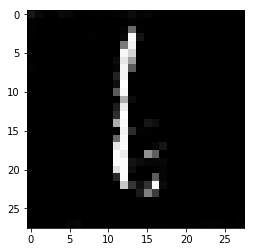

Epoch 10100/2...
==============Losses================
Discriminator: 0.9565
Generator: 2.0172


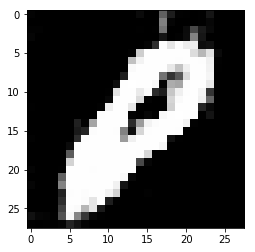

Epoch 10200/2...
==============Losses================
Discriminator: 1.4661
Generator: 0.8458


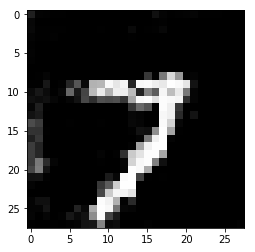

Epoch 10300/2...
==============Losses================
Discriminator: 0.6847
Generator: 1.6367


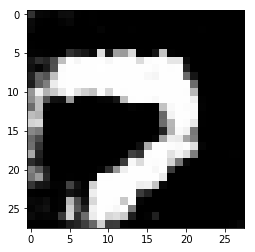

Epoch 10400/2...
==============Losses================
Discriminator: 1.0052
Generator: 1.2552


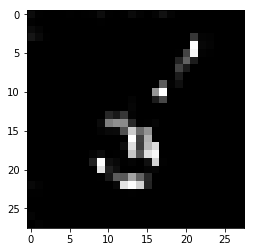

Epoch 10500/2...
==============Losses================
Discriminator: 0.8661
Generator: 1.1009


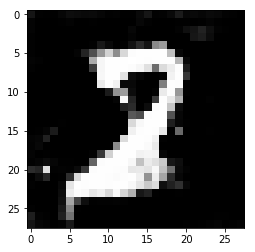

Epoch 10600/2...
==============Losses================
Discriminator: 0.6515
Generator: 1.8125


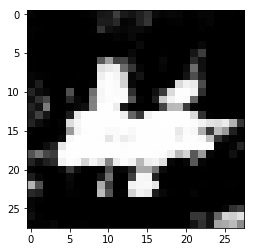

Epoch 10700/2...
==============Losses================
Discriminator: 0.9188
Generator: 0.9711


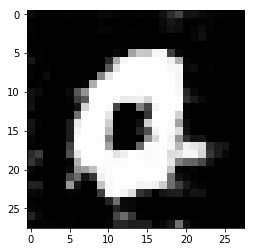

Epoch 10800/2...
==============Losses================
Discriminator: 0.8996
Generator: 1.2035


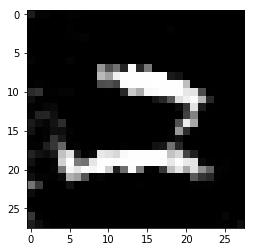

Epoch 10900/2...
==============Losses================
Discriminator: 0.8227
Generator: 1.3180


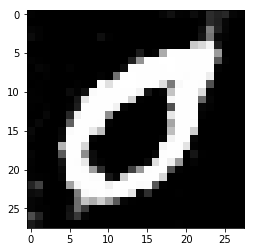

Epoch 11000/2...
==============Losses================
Discriminator: 0.7590
Generator: 1.5594


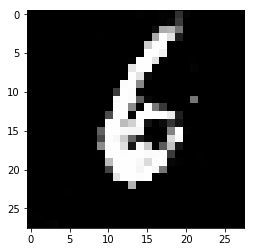

Epoch 11100/2...
==============Losses================
Discriminator: 0.9754
Generator: 1.1549


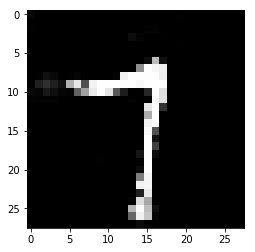

Epoch 11200/2...
==============Losses================
Discriminator: 0.9275
Generator: 1.8643


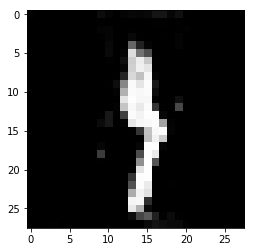

Epoch 11300/2...
==============Losses================
Discriminator: 0.6057
Generator: 2.0578


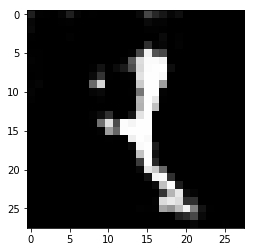

Epoch 11400/2...
==============Losses================
Discriminator: 1.2080
Generator: 0.8173


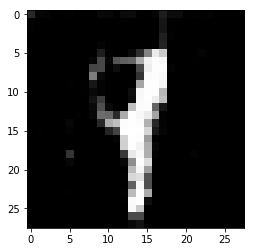

Epoch 11500/2...
==============Losses================
Discriminator: 1.4026
Generator: 0.7577


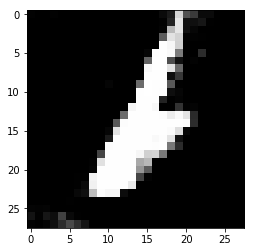

Epoch 11600/2...
==============Losses================
Discriminator: 0.8263
Generator: 1.2617


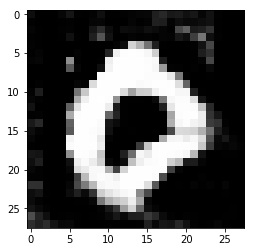

Epoch 11700/2...
==============Losses================
Discriminator: 0.6509
Generator: 1.4575


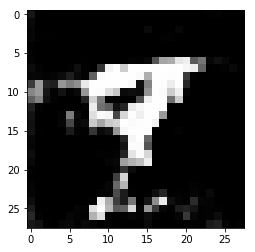

Epoch 11800/2...
==============Losses================
Discriminator: 0.5494
Generator: 2.4921


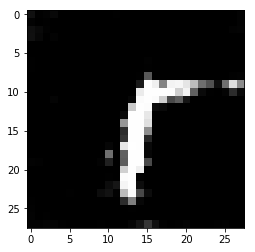

Epoch 11900/2...
==============Losses================
Discriminator: 0.8154
Generator: 1.3074


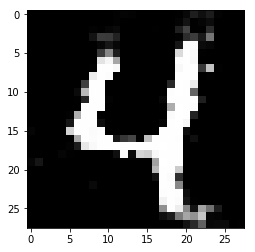

Epoch 12000/2...
==============Losses================
Discriminator: 1.8210
Generator: 0.5707


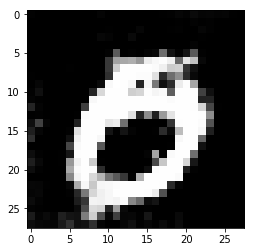

IndexError: list index out of range

In [22]:
batch_size = 10
z_dim = 100
learning_rate = 0.0003
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 100/1...
==============Losses================
Discriminator: 1.2739
Generator: 0.9603


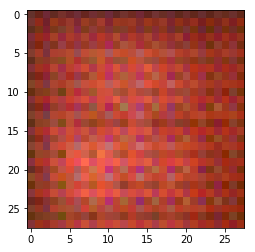

Epoch 200/1...
==============Losses================
Discriminator: 2.7491
Generator: 4.4744


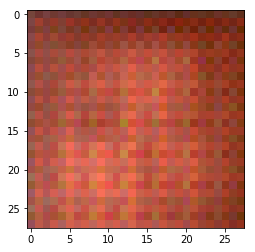

Epoch 300/1...
==============Losses================
Discriminator: 1.0426
Generator: 1.1480


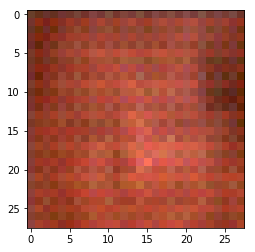

Epoch 400/1...
==============Losses================
Discriminator: 2.1475
Generator: 3.7175


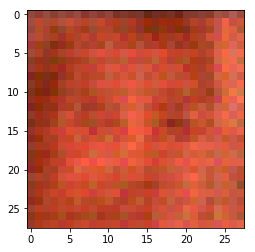

Epoch 500/1...
==============Losses================
Discriminator: 1.9023
Generator: 0.3294


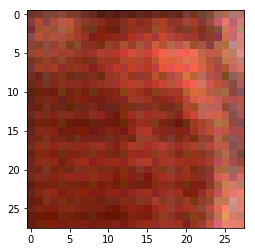

Epoch 600/1...
==============Losses================
Discriminator: 1.3132
Generator: 2.1044


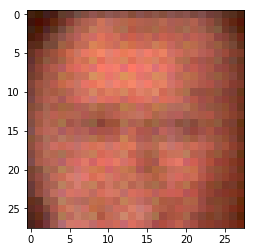

Epoch 700/1...
==============Losses================
Discriminator: 0.9919
Generator: 0.9384


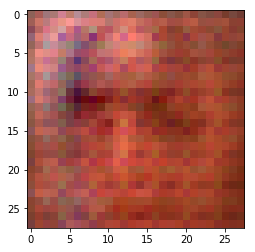

Epoch 800/1...
==============Losses================
Discriminator: 1.2746
Generator: 0.8429


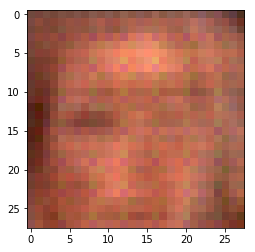

Epoch 900/1...
==============Losses================
Discriminator: 1.3387
Generator: 0.8756


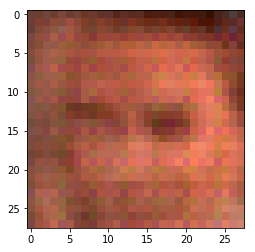

Epoch 1000/1...
==============Losses================
Discriminator: 1.1216
Generator: 1.1958


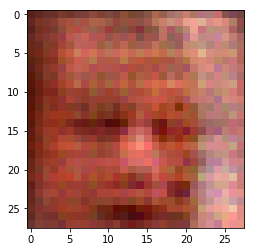

Epoch 1100/1...
==============Losses================
Discriminator: 0.6707
Generator: 1.6887


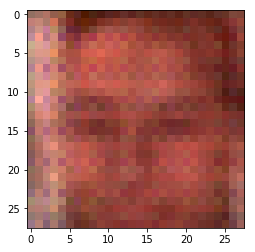

Epoch 1200/1...
==============Losses================
Discriminator: 0.8051
Generator: 1.9714


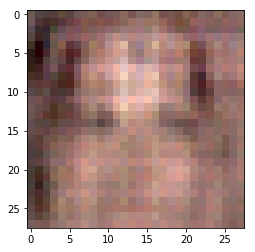

Epoch 1300/1...
==============Losses================
Discriminator: 2.2411
Generator: 2.3332


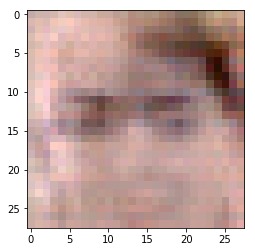

Epoch 1400/1...
==============Losses================
Discriminator: 0.4205
Generator: 3.1993


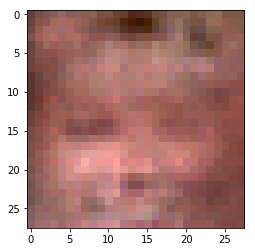

Epoch 1500/1...
==============Losses================
Discriminator: 0.7887
Generator: 3.2244


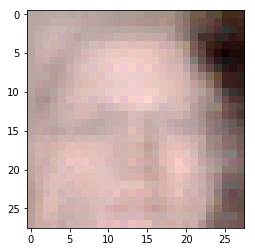

Epoch 1600/1...
==============Losses================
Discriminator: 1.0087
Generator: 2.0133


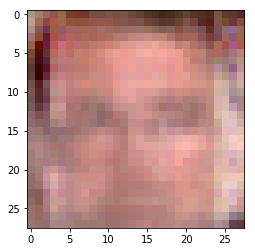

Epoch 1700/1...
==============Losses================
Discriminator: 0.6240
Generator: 2.4247


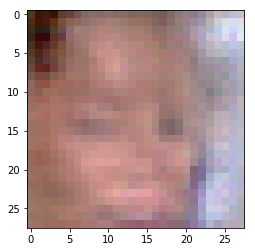

Epoch 1800/1...
==============Losses================
Discriminator: 0.9947
Generator: 1.0532


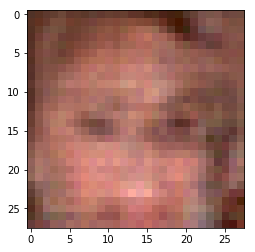

Epoch 1900/1...
==============Losses================
Discriminator: 2.4335
Generator: 5.5586


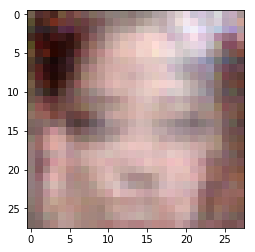

Epoch 2000/1...
==============Losses================
Discriminator: 0.4506
Generator: 2.8222


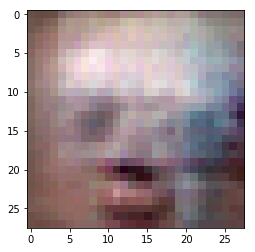

Epoch 2100/1...
==============Losses================
Discriminator: 1.4832
Generator: 0.5170


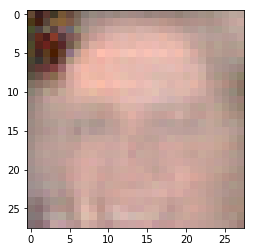

Epoch 2200/1...
==============Losses================
Discriminator: 0.6457
Generator: 1.7624


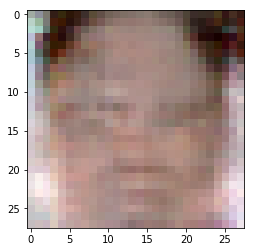

Epoch 2300/1...
==============Losses================
Discriminator: 0.7797
Generator: 1.3547


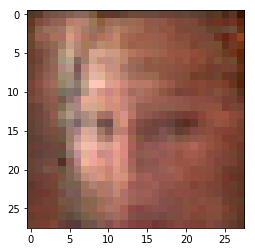

Epoch 2400/1...
==============Losses================
Discriminator: 0.6837
Generator: 1.6887


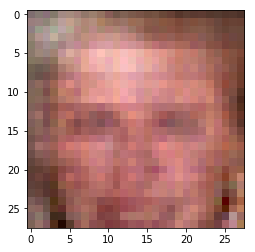

Epoch 2500/1...
==============Losses================
Discriminator: 1.0353
Generator: 1.0152


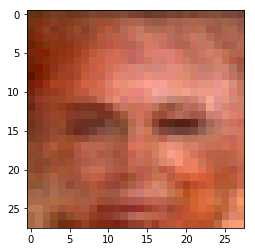

Epoch 2600/1...
==============Losses================
Discriminator: 0.4832
Generator: 2.3982


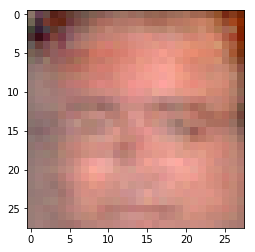

Epoch 2700/1...
==============Losses================
Discriminator: 0.6760
Generator: 1.6354


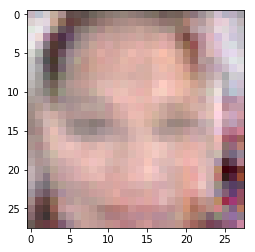

Epoch 2800/1...
==============Losses================
Discriminator: 4.0011
Generator: 0.0601


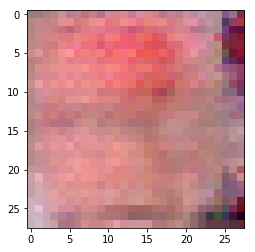

Epoch 2900/1...
==============Losses================
Discriminator: 0.6458
Generator: 1.7573


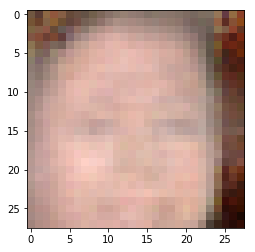

Epoch 3000/1...
==============Losses================
Discriminator: 0.9810
Generator: 1.0324


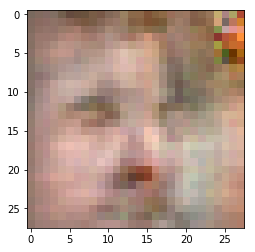

Epoch 3100/1...
==============Losses================
Discriminator: 0.4758
Generator: 2.8758


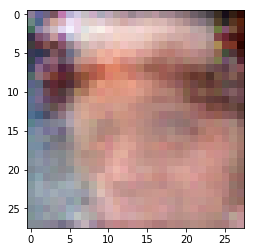

IndexError: list index out of range

In [23]:
batch_size = 64
z_dim = 100
learning_rate = 0.0003
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.